[Home](../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
import pickle

#### Step 2

Load the model for testing

In [2]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))

#### Step 3

Open and parse the test data CSV file and store the data as variable array data objects.



In [3]:
mx_col = [
    'budget', 'release_quarter', 'rating','is_sequel', 'runtime',
    'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy',
    'genre_Crime', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror',
    'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi',
    'genre_Sport', 'genre_Thriller', 'genre_Western'
]
testing_data = pd.read_csv('testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['gross'])

#### Step 4

Plot the test data features, targets and multiple  linear regression model to visually evaluate the model.


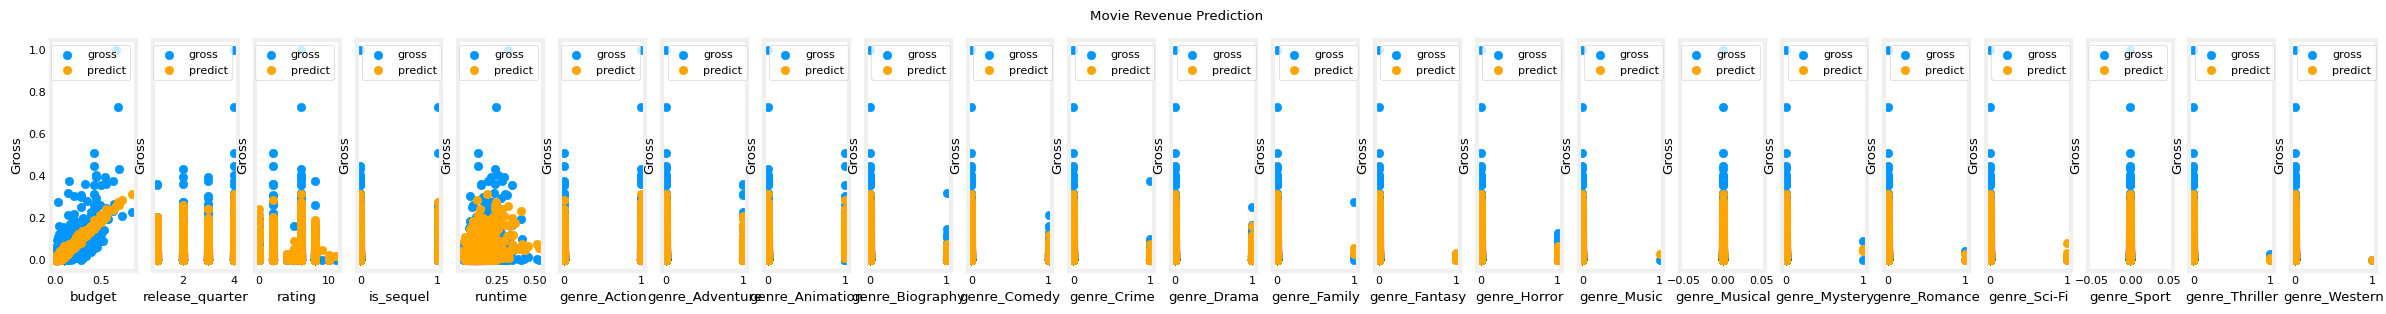

In [4]:
my_pred = model_A.predict(mx_test)
my_pred = np.maximum(my_pred, 0)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(30,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'gross')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Gross"); ax[i].legend();
fig.suptitle("Movie Revenue Prediction")
plt.show()

#### Step 5

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [5]:
test_score = model_A.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.4983993813917943


#### Step 6

 Manual Prediction

In [6]:
# Example input data
#   'budget', 'release_quarter', 'rating','is_sequel', 'country', 'runtime',
#   'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy',
#   'genre_Crime', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror',
#   'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi',
#   'genre_Sport', 'genre_Thriller', 'genre_Western'

# Reshape the input array to 2D
input_data = np.array([0.1685323190925766, 2, 6, 0, 0.1848184818481848, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)

# Predict using the reshaped input
my_pred = model_A.predict(input_data)
my_pred = np.maximum(my_pred, 0)  # Ensure non-negative prediction
print(f"Predicted gross revenue: {my_pred[0]}")

Predicted gross revenue: 0.05752734010415855


Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [7]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['gross'] = my_test
data['Predicted result'] = np.maximum(model_A.predict(mx_test), 0)  # Clip negative predictions
data['Cost'] = my_test - np.maximum(model_A.predict(mx_test), 0).round(2)  # Use clipped predictions

table = pd.DataFrame(data)
print(table[['gross', 'Predicted result', 'Cost']])

         gross  Predicted result      Cost
0     0.006943          0.023423 -0.013057
1     0.041475          0.047316 -0.008525
2     0.053981          0.014411  0.043981
3     0.004358          0.000000  0.004358
4     0.010591          0.023902 -0.009409
...        ...               ...       ...
1875  0.033356          0.074898 -0.036644
1876  0.002435          0.000000  0.002435
1877  0.000791          0.018013 -0.019209
1878  0.000601          0.004156  0.000601
1879  0.056707          0.069272 -0.013293

[1880 rows x 3 columns]


Prints the intercept and coefficient(s) of my trained model 

In [8]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: -0.024425224502173822
Coefficient: [ 3.76682831e-01  3.11559792e-04 -3.62428292e-04  1.70141755e-02
  9.81489236e-02  1.88104866e-03  1.59531732e-03  2.46758062e-02
 -6.74815251e-03  7.42035682e-04 -3.11094023e-03 -5.84848983e-03
  2.51942782e-02  7.35667737e-03  1.12738709e-02 -1.73472348e-18
 -4.11968220e-02  1.12371353e-02 -1.35613581e-02  1.04151455e-02
 -2.17903670e-02  2.51244233e-03 -4.62762771e-03]


These are the weights for each input feature, in the same order as my feature columns (`mx_col`).

Each coefficient tells me how a unit change in the corresponding feature affects the prediction, holding all else constant:

In [9]:
for feature, coef in zip(mx_col, model_A.coef_):
    print(f"{feature}: {coef:.4f}")


budget: 0.3767
release_quarter: 0.0003
rating: -0.0004
is_sequel: 0.0170
runtime: 0.0981
genre_Action: 0.0019
genre_Adventure: 0.0016
genre_Animation: 0.0247
genre_Biography: -0.0067
genre_Comedy: 0.0007
genre_Crime: -0.0031
genre_Drama: -0.0058
genre_Family: 0.0252
genre_Fantasy: 0.0074
genre_Horror: 0.0113
genre_Music: -0.0000
genre_Musical: -0.0412
genre_Mystery: 0.0112
genre_Romance: -0.0136
genre_Sci-Fi: 0.0104
genre_Sport: -0.0218
genre_Thriller: 0.0025
genre_Western: -0.0046


These results show that budget and runtime are the strongest positive predictors of movie revenue, meaning higher budgets and longer runtimes tend to generate more gross. Certain genres like Family and Animation also contribute positively, while genres such as Drama, Musical, and Romance slightly reduce expected revenue. Smaller effects are seen from features like sequel status, release quarter, and rating, indicating their influence is present but limited.